In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
df= pd.read_csv('/content/drive/MyDrive/SDP/rotten_tomatoes_movies.csv')

In [3]:
df.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,poster_image_url,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,audience_top_critics_count,audience_fresh_critics_count,audience_rotten_critics_count
0,/m/0814255,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,https://resizing.flixster.com/p1veUpQ4ktsSHtRu...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,Spilled,53.0,254287.0,38,71,73
1,/m/0878835,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,https://resizing.flixster.com/0AbudQ4KsB4BeXSB...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,Upright,64.0,11567.0,43,121,19
2,/m/10,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,https://resizing.flixster.com/mF0dxH6UTa0FdkMs...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,Spilled,53.0,14670.0,2,15,7
3,/m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,https://resizing.flixster.com/u-8xAyGaDVvROLiR...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,Upright,97.0,105000.0,6,51,0
4,/m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",https://resizing.flixster.com/FKExgYBHu07XLoil...,G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,Upright,74.0,68860.0,5,24,3


In [4]:
df.drop(['rotten_tomatoes_link','poster_image_url', 'rating', 'directors',
       'writers', 'cast', 'in_theaters_date', 'on_streaming_date',
       'runtime_in_minutes', 'studio_name', 'tomatometer_status',
       'tomatometer_rating', 'tomatometer_count', 'audience_status',
       'audience_rating', 'audience_count', 'audience_top_critics_count',
       'audience_fresh_critics_count', 'audience_rotten_critics_count'],axis=1,inplace=True)

In [5]:
df.rename(columns={'genre':'Genre', 'movie_title':'Title', 'movie_info':'Description','critics_consensus':'Critics_view'},inplace=True)

In [6]:
df.columns

Index(['Title', 'Description', 'Critics_view', 'Genre'], dtype='object')

In [7]:
df.head()

,Title,Description,Critics_view,Genre
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,"Action & Adventure, Comedy, Drama, Science Fic..."
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,Comedy
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,"Comedy, Romance"
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,"Classics, Drama"
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...","Action & Adventure, Drama, Kids & Family"


In [8]:
df= df.dropna(axis=0,how='any') #fill empty spaces with NA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8306 entries, 0 to 16634
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         8306 non-null   object
 1   Description   8306 non-null   object
 2   Critics_view  8306 non-null   object
 3   Genre         8306 non-null   object
dtypes: object(4)
memory usage: 324.5+ KB


In [10]:
type(df['Genre'][0])

str

In [11]:
df.Genre[0]

'Action & Adventure, Comedy, Drama, Science Fiction & Fantasy'

In [12]:
df.head()

,Title,Description,Critics_view,Genre
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,"Action & Adventure, Comedy, Drama, Science Fic..."
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,Comedy
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,"Classics, Drama"
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...","Action & Adventure, Drama, Kids & Family"
5,"10,000 B.C.",A young outcast from a primitive tribe is forc...,With attention strictly paid to style instead ...,"Action & Adventure, Classics, Drama"


In [13]:
type(df['Genre'])

pandas.core.series.Series

In [14]:
import re
str1 = df.Genre[0]

res = re.findall(r"[\w']+", str1)

In [15]:
print(res)
print(type(res))

['Action', 'Adventure', 'Comedy', 'Drama', 'Science', 'Fiction', 'Fantasy']
<class 'list'>


In [16]:
def Convert(string): 
    li = list(re.findall(r"[\w']+", string)) 
    return li 

str1 = df.Genre[0]
print(Convert(str1))
print(type(Convert(str1)))

['Action', 'Adventure', 'Comedy', 'Drama', 'Science', 'Fiction', 'Fantasy']
<class 'list'>


In [17]:
genres=[]
for i in df['Genre']: 
  str2=i
  genres.append(Convert(str2))


In [18]:
genres

[['Action', 'Adventure', 'Comedy', 'Drama', 'Science', 'Fiction', 'Fantasy'],
 ['Comedy'],
 ['Classics', 'Drama'],
 ['Action', 'Adventure', 'Drama', 'Kids', 'Family'],
 ['Action', 'Adventure', 'Classics', 'Drama'],
 ['Action', 'Adventure', 'Classics', 'Mystery', 'Suspense'],
 ['Drama'],
 ['Classics', 'Comedy', 'Romance'],
 ['Art', 'House', 'International', 'Drama', 'Faith', 'Spirituality'],
 ['Drama', 'Mystery', 'Suspense'],
 ['Documentary', 'Special', 'Interest'],
 ['Action', 'Adventure', 'Classics', 'Romance'],
 ['Drama', 'Science', 'Fiction', 'Fantasy', 'Romance'],
 ['Action', 'Adventure', 'Drama', 'Mystery', 'Suspense'],
 ['Action', 'Adventure', 'Drama', 'Horror', 'Science', 'Fiction', 'Fantasy'],
 ['Animation', 'Kids', 'Family', 'Science', 'Fiction', 'Fantasy'],
 ['Horror', 'Mystery', 'Suspense'],
 ['Action', 'Adventure', 'Comedy', 'Drama', 'Mystery', 'Suspense'],
 ['Art', 'House', 'International', 'Drama'],
 ['Comedy', 'Drama'],
 ['Comedy', 'Romance'],
 ['Drama', 'Kids', 'Family'

In [19]:
df['Genre_new'] = genres

In [20]:
df.head()

,Title,Description,Critics_view,Genre,Genre_new
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,"Action & Adventure, Comedy, Drama, Science Fic...","[Action, Adventure, Comedy, Drama, Science, Fi..."
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,Comedy,[Comedy]
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,"Classics, Drama","[Classics, Drama]"
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...","Action & Adventure, Drama, Kids & Family","[Action, Adventure, Drama, Kids, Family]"
5,"10,000 B.C.",A young outcast from a primitive tribe is forc...,With attention strictly paid to style instead ...,"Action & Adventure, Classics, Drama","[Action, Adventure, Classics, Drama]"


In [21]:
all_genres = sum(genres,[])
len(set(all_genres))

36

In [22]:
all_genres

['Action',
 'Adventure',
 'Comedy',
 'Drama',
 'Science',
 'Fiction',
 'Fantasy',
 'Comedy',
 'Classics',
 'Drama',
 'Action',
 'Adventure',
 'Drama',
 'Kids',
 'Family',
 'Action',
 'Adventure',
 'Classics',
 'Drama',
 'Action',
 'Adventure',
 'Classics',
 'Mystery',
 'Suspense',
 'Drama',
 'Classics',
 'Comedy',
 'Romance',
 'Art',
 'House',
 'International',
 'Drama',
 'Faith',
 'Spirituality',
 'Drama',
 'Mystery',
 'Suspense',
 'Documentary',
 'Special',
 'Interest',
 'Action',
 'Adventure',
 'Classics',
 'Romance',
 'Drama',
 'Science',
 'Fiction',
 'Fantasy',
 'Romance',
 'Action',
 'Adventure',
 'Drama',
 'Mystery',
 'Suspense',
 'Action',
 'Adventure',
 'Drama',
 'Horror',
 'Science',
 'Fiction',
 'Fantasy',
 'Animation',
 'Kids',
 'Family',
 'Science',
 'Fiction',
 'Fantasy',
 'Horror',
 'Mystery',
 'Suspense',
 'Action',
 'Adventure',
 'Comedy',
 'Drama',
 'Mystery',
 'Suspense',
 'Art',
 'House',
 'International',
 'Drama',
 'Comedy',
 'Drama',
 'Comedy',
 'Romance',
 'Dram

In [23]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

%matplotlib inline
pd.set_option('display.max_colwidth', 300)

In [24]:
all_genres = nltk.FreqDist(all_genres) 

# create dataframe
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})

In [25]:
all_genres_df

,Genre,Count
0,Action,1854
1,Adventure,1854
2,Comedy,2827
3,Drama,4643
4,Science,1046
5,Fiction,1046
6,Fantasy,1046
7,Classics,417
8,Kids,617
9,Family,617


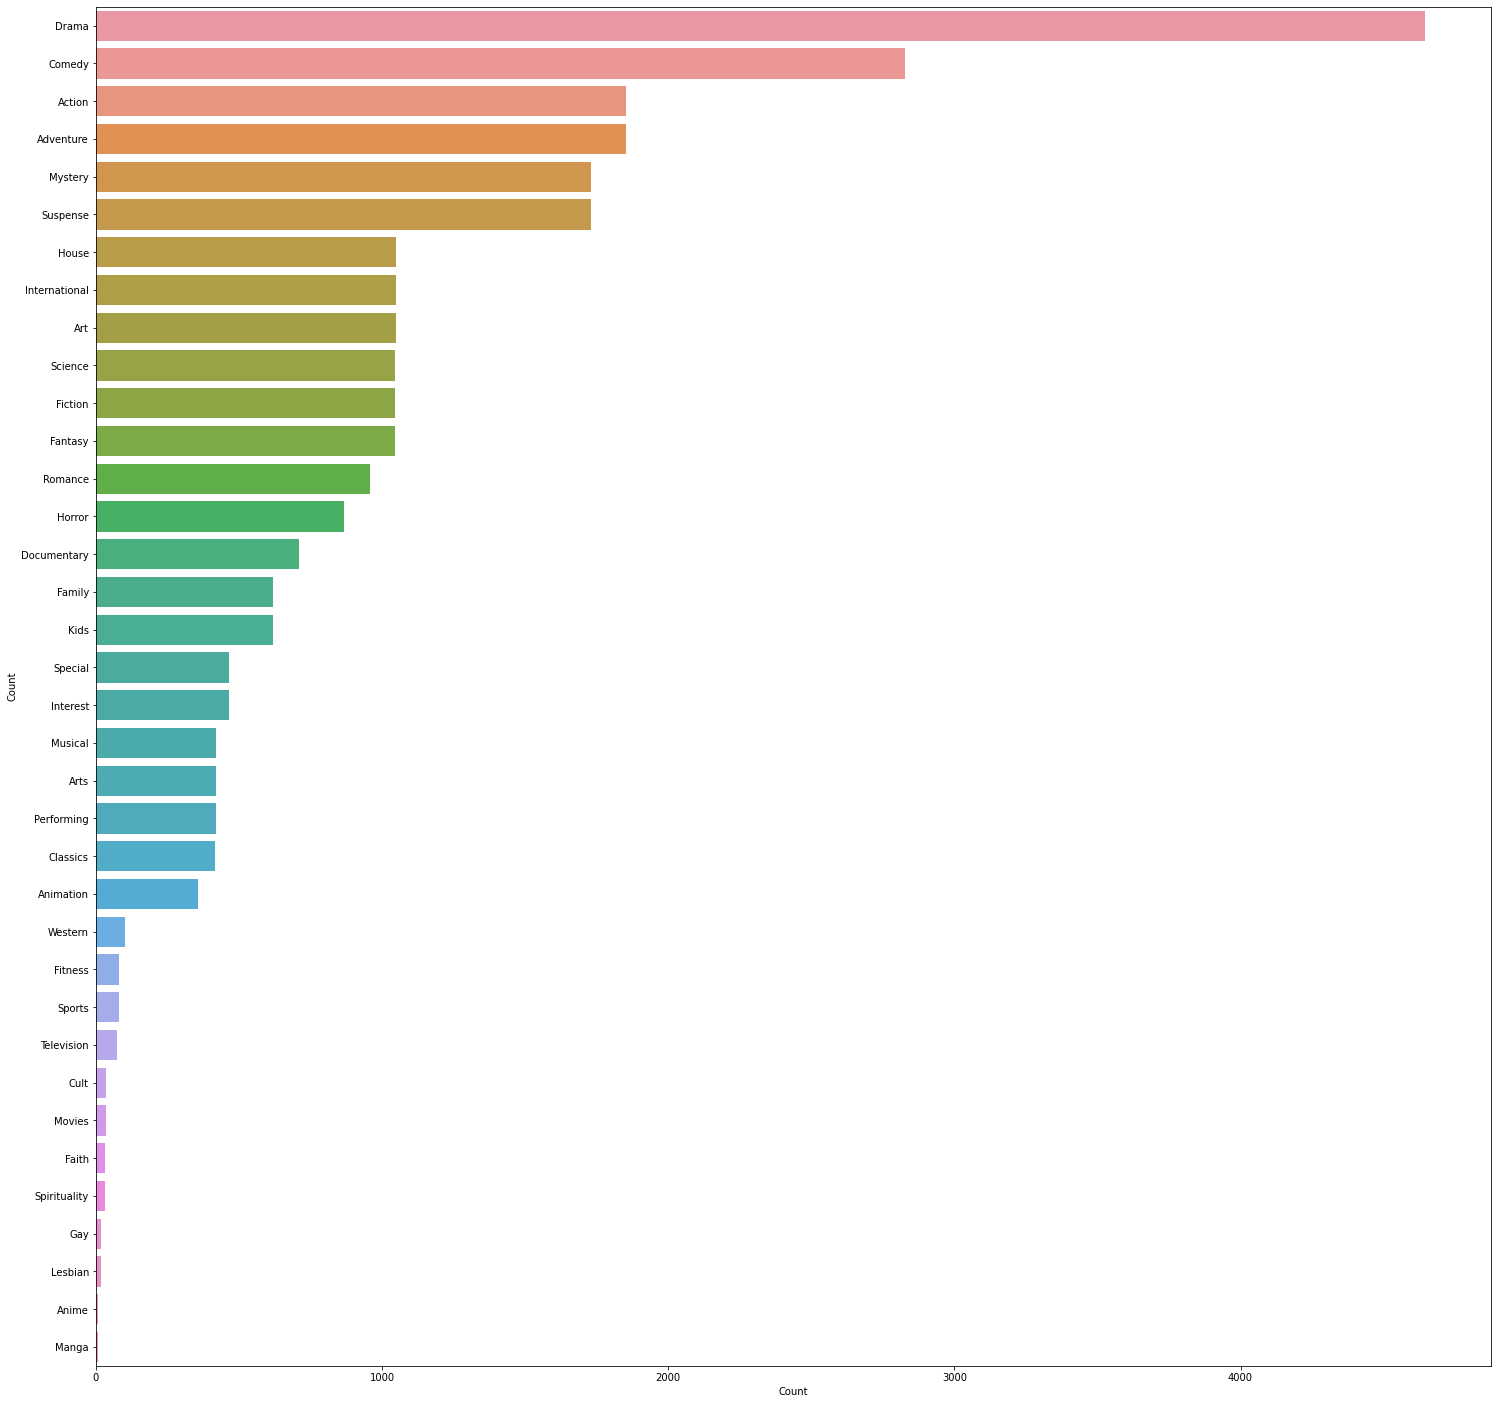

In [26]:
g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(25,25)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Count') 
plt.show()

In [27]:

#from google.colab import drive 
#drive.mount('/content/drive') 


In [28]:
import nltk
nltk.download()
nltk.download('punkt')

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [

True

In [29]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [30]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [31]:
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
#from nltk.stem.porter import PorterStemmer
#ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()


In [32]:
def clean_text(text):
    text = re.sub('[^a-zA-Z]', ' ',text)
    text = text.lower() 
    text = TextBlob(text)
    text = text.correct()
    text = text.split()

    text = [lemmatizer.lemmatize(word) for word in text if not word in stopwords.words('english')]
    text = ' '.join(text)
    
    return text

In [33]:
df['description'] = df['Description'].apply(lambda x: clean_text(x))

In [35]:
df.head()

,Title,Description,Critics_view,Genre,Genre_new,description
0,Percy Jackson & the Olympians: The Lightning Thief,A teenager discovers he's the descendant of a Greek god and sets out on an adventure to settle an on-going battle between the gods.,"Though it may seem like just another Harry Potter knockoff, Percy Jackson benefits from a strong supporting cast, a speedy plot, and plenty of fun with Greek mythology.","Action & Adventure, Comedy, Drama, Science Fiction & Fantasy","[Action, Adventure, Comedy, Drama, Science, Fiction, Fantasy]",teenager discovers descendant greek god set adventure settle going battle god
1,Please Give,Kate has a lot on her mind. There's the ethics problem of buying furniture on the cheap at estate sales and marking it up at her trendy Manhattan store. And how much markup can she get away with? There's the materialism problem of not wanting her teenage daughter to want the expensive things tha...,"Nicole Holofcener's newest might seem slight in places, but its rendering of complex characters in a conflicted economic landscape is varied, natural, and touching all the same.",Comedy,[Comedy],kate lot mind ethic problem buying furniture cheap estate sale marking trend manhattan store much marked get away material problem wanting teenage daughter want expensive thing kate want marriage problem sharing partnership printing business life husband flex sensing doubt bubbling foundation ka...
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, accused of knifing his father to death. The twelve jurors retire to the jury room, having been admonished that the defendant is innocent until proven guilty beyond a reasonable doubt. Eleven of the jurors vote for conviction, each for reasons of his o...","Sidney Lumet's feature debut is a superbly written, dramatically effective courtroom thriller that rightfully stands as a modern classic.","Classics, Drama","[Classics, Drama]",porto ricans youth trial murder accused knowing father death twelve rumor retire jury room astonished defendant innocent prove guilty beyond reasonable doubt eleven rumor vote conviction reason sole holdout jury played henry fond fond persuaded weary rumor examine evidence learn backstory man ju...
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,000 Leagues Under the Sea represented the studio's costliest and most elaborate American-filmed effort to date. Kirk Douglas plays a trouble-shooting 19th century seaman, trying to discover why so many whaling ships have been disappearing of late. Tea...","One of Disney's finest live-action adventures, 20,000 Leagues Under the Sea brings Jules Verne's classic sci-fi tale to vivid life, and features an awesome giant squid.","Action & Adventure, Drama, Kids & Family","[Action, Adventure, Drama, Kids, Family]",dinner version rule verse league sea represented studio costliest elaborate american filled effort date kirk douglas play trouble shooting th century seaman trying discover many ship disappearing late tearing scientist paul lupus river peter lorry douglas set sail investigate promptly captured m...
5,"10,000 B.C.","A young outcast from a primitive tribe is forced to defend his people from a brutal onslaught in Independence Day director Roland Emmerich's fast-paced period adventure. Despite the fact that he is low man on the totem pole in his tribe of fearless hunters, a brave young boy (Steven Strait) long...","With attention strictly paid to style instead of substance, or historical accuracy, 10,000 B.C. is a visually impressive but narratively flimsy epic.","Action & Adventure, Classics, Drama","[Action, Adventure, Classics, Drama]",young outcast primitive tribe forced defend people brutal onslaught independence day director poland emmerich fast paced period adventure despite fact low man pole tribe fearless hunter brave young boy seven strait long win heart beautiful princess axilla belle well station life overwhelming hor...


In [ ]:
df.to_csv('/content/drive/My Drive/SDP/Multilabel_genre_predict_bigdata.csv') # with already text processed 

In [36]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(df['Genre_new'])

# transform target variable
y = multilabel_binarizer.transform(df['Genre_new'])

In [37]:
y.shape

(8306, 36)

In [38]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

In [40]:
import pickle
pickle.dump(tfidf_vectorizer, open('/content/drive/My Drive/SDP/tranform_multilabel.pkl', 'wb'))

In [41]:
xtrain, xval, ytrain, yval = train_test_split(df['description'], y, test_size=0.2, random_state=42)

In [42]:
# create TF-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

In [43]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

In [44]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)
# fit model on train data
clf.fit(xtrain_tfidf, ytrain)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [45]:
# make predictions for validation set
y_pred = clf.predict(xval_tfidf)

In [46]:
f1_score(yval, y_pred, average="micro")

0.42241490876148574

In [47]:
y_pred[3]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [48]:
multilabel_binarizer.inverse_transform(y_pred)[3]

('Drama',)

In [49]:
# predict probabilities
y_pred_prob = clf.predict_proba(xval_tfidf)

t = 0.30 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)


# evaluate performance
f1_score(yval, y_pred_new, average="micro")

0.5739901477832513

In [50]:
def infer_tags(q):
    q = clean_text(q)
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = clf.predict(q_vec)
    return multilabel_binarizer.inverse_transform(q_pred)


In [51]:
for i in range(5): 
  k = xval.sample(1).index[0] 
  print("Movie: ", df['Title'][k], "\nPredicted genre: ", infer_tags(xval[k])), print("Actual genre: ",df['Genre_new'][k], "\n")


Movie:  Lost in America 
Predicted genre:  [('Comedy',)]
Actual genre:  ['Comedy'] 

Movie:  Dr. Dolittle 
Predicted genre:  [('Comedy', 'Family', 'Kids')]
Actual genre:  ['Comedy', 'Kids', 'Family'] 

Movie:  La mujer de mi hermano 
Predicted genre:  [('Drama',)]
Actual genre:  ['Art', 'House', 'International', 'Drama', 'Special', 'Interest'] 

Movie:  Cleopatra 
Predicted genre:  [('Action', 'Adventure', 'Drama')]
Actual genre:  ['Classics', 'Drama'] 

Movie:  Pompeii 
Predicted genre:  [('Action', 'Adventure', 'Drama')]
Actual genre:  ['Action', 'Adventure', 'Drama', 'Mystery', 'Suspense'] 



In [ ]:
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

clf_svc = OneVsRestClassifier(SVC()).fit(xtrain_tfidf, ytrain)
clf_svc.predict(xval_tfidf)
clf_svc.score(xval_tfidf,yval)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
sgd = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=6, tol=None)
sgd1 = OneVsRestClassifier(sgd)
sgd1.fit(xtrain_tfidf, ytrain)
y0 = sgd1.predict(xval_tfidf)
print(f1_score(yval, y0, average="micro"))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
clf_dct = DecisionTreeClassifier(random_state=0)
clf_dct1 = OneVsRestClassifier(clf_dct)
clf_dct1.fit(xtrain_tfidf, ytrain)
y1 = clf_dct1.predict(xval_tfidf)
f1_score(yval, y1, average="micro")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh1 = OneVsRestClassifier(neigh)
neigh1.fit(xtrain_tfidf, ytrain)
y2 = neigh1.predict(xval_tfidf)
f1_score(yval, y2, average="micro")

In [ ]:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(random_state=1, max_iter=500)
clf_mlp1 = OneVsRestClassifier(clf_mlp)
clf_mlp1.fit(xtrain_tfidf, ytrain)
y3 = clf_mlp1.predict(xval_tfidf)
f1_score(yval, y3, average="micro")

In [ ]:
from sklearn.neighbors import RadiusNeighborsClassifier
rneigh = RadiusNeighborsClassifier(radius=100.0)
rneigh1= OneVsRestClassifier(rneigh)
rneigh1.fit(xtrain_tfidf, ytrain)
y4 = rneigh1.predict(xval_tfidf)
f1_score(yval, y4, average="micro")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_r = RandomForestClassifier(max_depth=100, random_state=0)
clf_r1= OneVsRestClassifier(clf_r)
clf_r1.fit(xtrain_tfidf, ytrain)
y5 = clf_r1.predict(xval_tfidf)
f1_score(yval, y5, average="micro")

In [ ]:
from sklearn.linear_model import RidgeClassifierCV
clf_rcv = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1])
clf_rcv1= OneVsRestClassifier(clf_rcv)
clf_rcv1.fit(xtrain_tfidf, ytrain)
y6 = clf_rcv1.predict(xval_tfidf)
f1_score(yval, y6, average="micro")

# Using Word Vectors

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_md

In [54]:
import spacy
import en_core_web_md
nlp = en_core_web_md.load()

In [55]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(df['Genre_new'])

# transform target variable
y = multilabel_binarizer.transform(df['Genre_new'])

In [56]:
y.shape

(8306, 36)

In [57]:
xtrain, xval, ytrain, yval = train_test_split(df['description'], y, test_size=0.2, random_state=42)

In [ ]:
# create TF-IDF features
#xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
#xval_tfidf = tfidf_vectorizer.transform(xval)

In [58]:
print(xtrain[0])
print(ytrain[0])

teenager discovers descendant greek god set adventure settle going battle god
[0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [59]:
docs = [nlp(text) for text in xtrain]
train_x_word_vectors = [x.vector for x in docs]

In [60]:
test_docs = [nlp(text) for text in xval]
test_x_word_vectors =  [x.vector for x in test_docs]

### Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

In [ ]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)
# fit model on train data
clf.fit(train_x_word_vectors, ytrain)

In [63]:
# make predictions for validation set
y_pred = clf.predict(test_x_word_vectors)

In [64]:
f1_score(yval, y_pred, average="micro")

0.5149620366234926

In [65]:
y_pred[3]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [66]:
multilabel_binarizer.inverse_transform(y_pred)[3]

('Comedy', 'Drama')

In [67]:
# predict probabilities
y_pred_prob = clf.predict_proba(test_x_word_vectors)

t = 0.30 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)


# evaluate performance
f1_score(yval, y_pred_new, average="micro")

0.5928092207121968

In [68]:
filename = '/content/drive/My Drive/SDP/nlp_multilabel_genre_model_test.pkl'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

clf_svc = OneVsRestClassifier(SVC())
clf_svc.fit(train_x_word_vectors, ytrain)
Y = clf_svc.predict(test_x_word_vectors)
print(f1_score(yval, Y, average="micro"))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
mn=GaussianNB()
mn_clf=OneVsRestClassifier(mn)
mn_clf.fit(train_x_word_vectors, ytrain)
y7 = mn_clf.predict(test_x_word_vectors)
print(f1_score(yval, y7, average="micro"))

0.4495581315276025


In [ ]:
sgd = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=6, tol=None)
sgd1 = OneVsRestClassifier(sgd)
sgd1.fit(train_x_word_vectors, ytrain)
y0 = sgd1.predict(test_x_word_vectors)
print(f1_score(yval, y0, average="micro"))

0.4775287423063523


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
clf_dct = DecisionTreeClassifier(random_state=0)
clf_dct1 = OneVsRestClassifier(clf_dct)
clf_dct1.fit(train_x_word_vectors, ytrain)
y1 = clf_dct1.predict(test_x_word_vectors)
f1_score(yval, y1, average="micro")

0.36365128878673453

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh1 = OneVsRestClassifier(neigh)
neigh1.fit(train_x_word_vectors, ytrain)
y2 = neigh1.predict(test_x_word_vectors)
f1_score(yval, y2, average="micro")

0.4272340425531914

In [ ]:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(random_state=1, max_iter=100)
clf_mlp1 = OneVsRestClassifier(clf_mlp)
clf_mlp1.fit(train_x_word_vectors, ytrain)
y3 = clf_mlp1.predict(test_x_word_vectors)
f1_score(yval, y3, average="micro")

In [ ]:
from sklearn.neighbors import RadiusNeighborsClassifier
rneigh = RadiusNeighborsClassifier(radius=100.0)
rneigh1= OneVsRestClassifier(rneigh)
rneigh1.fit(train_x_word_vectors, ytrain)
y4 = rneigh1.predict(test_x_word_vectors)
f1_score(yval, y4, average="micro")

0.2577192260189378

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_r = RandomForestClassifier(max_depth=50, random_state=0)
clf_r1= OneVsRestClassifier(clf_r)
clf_r1.fit(train_x_word_vectors, ytrain)
y5 = clf_r1.predict(test_x_word_vectors)
f1_score(yval, y5, average="micro")

0.3663775850567045

In [ ]:
from sklearn.linear_model import RidgeClassifierCV
clf_rcv = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1])
clf_rcv1= OneVsRestClassifier(clf_rcv)
clf_rcv1.fit(train_x_word_vectors, ytrain)
y6 = clf_rcv1.predict(test_x_word_vectors)
f1_score(yval, y6, average="micro")

0.47906316536550736

In [ ]:
df['description'].max()

'zookeeper animal franklin park love kindhearted caretaker griffe eye even james finding comfortable lion lady griffe decides way get girl life leave find amorous job animal panic decide break time honored code silence reveal biggest secret talk keep griffe leaving decide teach rule courtship animal style c sonya picture publicity'

In [ ]:
df

,Title,Description,Critics_view,Genre,Genre_new,description
0,Percy Jackson & the Olympians: The Lightning Thief,A teenager discovers he's the descendant of a Greek god and sets out on an adventure to settle an on-going battle between the gods.,"Though it may seem like just another Harry Potter knockoff, Percy Jackson benefits from a strong supporting cast, a speedy plot, and plenty of fun with Greek mythology.","Action & Adventure, Comedy, Drama, Science Fiction & Fantasy","[Action, Adventure, Comedy, Drama, Science, Fiction, Fantasy]",teenager discovers descendant greek god set adventure settle going battle god
1,Please Give,Kate has a lot on her mind. There's the ethics problem of buying furniture on the cheap at estate sales and marking it up at her trendy Manhattan store. And how much markup can she get away with? There's the materialism problem of not wanting her teenage daughter to want the expensive things tha...,"Nicole Holofcener's newest might seem slight in places, but its rendering of complex characters in a conflicted economic landscape is varied, natural, and touching all the same.",Comedy,[Comedy],kate lot mind ethic problem buying furniture cheap estate sale marking trend manhattan store much marked get away material problem wanting teenage daughter want expensive thing kate want marriage problem sharing partnership printing business life husband flex sensing doubt bubbling foundation ka...
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, accused of knifing his father to death. The twelve jurors retire to the jury room, having been admonished that the defendant is innocent until proven guilty beyond a reasonable doubt. Eleven of the jurors vote for conviction, each for reasons of his o...","Sidney Lumet's feature debut is a superbly written, dramatically effective courtroom thriller that rightfully stands as a modern classic.","Classics, Drama","[Classics, Drama]",porto ricans youth trial murder accused knowing father death twelve rumor retire jury room astonished defendant innocent prove guilty beyond reasonable doubt eleven rumor vote conviction reason sole holdout jury played henry fond fond persuaded weary rumor examine evidence learn backstory man ju...
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,000 Leagues Under the Sea represented the studio's costliest and most elaborate American-filmed effort to date. Kirk Douglas plays a trouble-shooting 19th century seaman, trying to discover why so many whaling ships have been disappearing of late. Tea...","One of Disney's finest live-action adventures, 20,000 Leagues Under the Sea brings Jules Verne's classic sci-fi tale to vivid life, and features an awesome giant squid.","Action & Adventure, Drama, Kids & Family","[Action, Adventure, Drama, Kids, Family]",dinner version rule verse league sea represented studio costliest elaborate american filled effort date kirk douglas play trouble shooting th century seaman trying discover many ship disappearing late tearing scientist paul lupus river peter lorry douglas set sail investigate promptly captured m...
5,"10,000 B.C.","A young outcast from a primitive tribe is forced to defend his people from a brutal onslaught in Independence Day director Roland Emmerich's fast-paced period adventure. Despite the fact that he is low man on the totem pole in his tribe of fearless hunters, a brave young boy (Steven Strait) long...","With attention strictly paid to style instead of substance, or historical accuracy, 10,000 B.C. is a visually impressive but narratively flimsy epic.","Action & Adventure, Classics, Drama","[Action, Adventure, Classics, Drama]",young outcast primitive tribe forced defend people brutal onslaught independence day director poland emmerich fast paced period adventure despite fact low man pole tribe fearless hunter brave young boy seven strait long win heart beautiful princess axilla belle well station life overwhelming hor...
...,...,...,...,

# Using Deep Learning

In [ ]:
def max_len(x):
    a=x.split()
    return len(a)

max(df['description'].apply(max_len))

1331

In [ ]:
# create TF-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain).toarray()
xval_tfidf = tfidf_vectorizer.transform(xval).toarray()

In [ ]:
xtrain_tfidf[0] 

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
labels = multilabel_binarizer.classes_
print(labels)

['Action' 'Adventure' 'Animation' 'Anime' 'Art' 'Arts' 'Classics' 'Comedy'
 'Cult' 'Documentary' 'Drama' 'Faith' 'Family' 'Fantasy' 'Fiction'
 'Fitness' 'Gay' 'Horror' 'House' 'Interest' 'International' 'Kids'
 'Lesbian' 'Manga' 'Movies' 'Musical' 'Mystery' 'Performing' 'Romance'
 'Science' 'Special' 'Spirituality' 'Sports' 'Suspense' 'Television'
 'Western']


## Using LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [ ]:
voc_size=10000

In [ ]:
onehot_repr=[one_hot(words,voc_size)for words in df['description']] 
onehot_repr

[[1216, 6914, 3555, 683, 6021, 2411, 6872, 4371, 3622, 6085, 6021],
 [4942,
  8652,
  7430,
  4037,
  8662,
  5086,
  609,
  6093,
  5515,
  5135,
  8133,
  4252,
  6182,
  6651,
  9343,
  5117,
  7505,
  9058,
  8797,
  8662,
  1701,
  7669,
  4750,
  5640,
  4118,
  8175,
  4942,
  5640,
  7463,
  8662,
  2417,
  5528,
  35,
  6378,
  4996,
  7446,
  6324,
  8730,
  7196,
  2858,
  6599,
  4942,
  1771,
  2058,
  7333,
  6401,
  4886,
  8662,
  3029,
  3545,
  3480,
  4910,
  4071,
  9343,
  4926,
  9064,
  1918,
  9658,
  3660,
  2745,
  2574,
  2309,
  302,
  2340,
  7370,
  8380,
  3228],
 [3854,
  9604,
  1432,
  2334,
  7998,
  8105,
  8522,
  732,
  9522,
  592,
  7197,
  2256,
  831,
  8779,
  1646,
  3412,
  2158,
  5314,
  147,
  8305,
  4256,
  7196,
  8001,
  7197,
  5782,
  1470,
  8790,
  8071,
  280,
  831,
  1927,
  5556,
  1878,
  1878,
  2320,
  350,
  7197,
  8016,
  8195,
  4335,
  8341,
  6056,
  831,
  1549,
  1625,
  3326,
  6923,
  1154,
  7328,
  6056,
  7690,

In [ ]:
sent_length=700
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)


[[   0    0    0 ... 3622 6085 6021]
 [   0    0    0 ... 7370 8380 3228]
 [   0    0    0 ... 1044 7578 3398]
 ...
 [   0    0    0 ... 9163 1814 7253]
 [   0    0    0 ... 2868 7770 9148]
 [   0    0    0 ... 8020 7434  656]]


In [ ]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [ ]:
embedding_vector_features=300
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(36,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 700, 300)          3000000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_3 (Dense)              (None, 36)                3636      
Total params: 3,164,036
Trainable params: 3,164,036
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
len(embedded_docs),y.shape

(8306, (8306, 36))

In [ ]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [ ]:
X_final.shape,y_final.shape

((8306, 700), (8306, 36))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.25, random_state=42)

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=200,epochs=20)

Epoch 1/20
32/32 [==============================] - 6s 200ms/step - loss: 0.4434 - accuracy: 0.1926 - val_loss: 0.2563 - val_accuracy: 0.2335
Epoch 2/20
32/32 [==============================] - 6s 188ms/step - loss: 0.2529 - accuracy: 0.2233 - val_loss: 0.2496 - val_accuracy: 0.2335
Epoch 3/20
32/32 [==============================] - 6s 188ms/step - loss: 0.2501 - accuracy: 0.2233 - val_loss: 0.2488 - val_accuracy: 0.2335
Epoch 4/20
32/32 [==============================] - 6s 188ms/step - loss: 0.2495 - accuracy: 0.2233 - val_loss: 0.2484 - val_accuracy: 0.2335
Epoch 5/20
32/32 [==============================] - 6s 189ms/step - loss: 0.2482 - accuracy: 0.2233 - val_loss: 0.2480 - val_accuracy: 0.2335
Epoch 6/20
32/32 [==============================] - 6s 187ms/step - loss: 0.2465 - accuracy: 0.2233 - val_loss: 0.2473 - val_accuracy: 0.2335
Epoch 7/20
32/32 [==============================] - 6s 188ms/step - loss: 0.2429 - accuracy: 0.2222 - val_loss: 0.2460 - val_accuracy: 0.2335
Epoch 

In [ ]:
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=1000
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(Dropout(0.2))
model1.add(LSTM(128))
#model.add(Dropout(0.5))
model1.add(Dense(36,activation='sigmoid'))

model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:

model1.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=200,epochs=20)

Epoch 1/20
32/32 [==============================] - 18s 556ms/step - loss: 0.4053 - accuracy: 0.1856 - val_loss: 0.2535 - val_accuracy: 0.2335
Epoch 2/20
32/32 [==============================] - 17s 542ms/step - loss: 0.2519 - accuracy: 0.2233 - val_loss: 0.2493 - val_accuracy: 0.2335
Epoch 3/20
32/32 [==============================] - 18s 548ms/step - loss: 0.2493 - accuracy: 0.2233 - val_loss: 0.2485 - val_accuracy: 0.2335
Epoch 4/20
32/32 [==============================] - 17s 547ms/step - loss: 0.2476 - accuracy: 0.2233 - val_loss: 0.2476 - val_accuracy: 0.2335
Epoch 5/20
32/32 [==============================] - 17s 544ms/step - loss: 0.2445 - accuracy: 0.2233 - val_loss: 0.2467 - val_accuracy: 0.2335
Epoch 6/20
32/32 [==============================] - 17s 546ms/step - loss: 0.2384 - accuracy: 0.2256 - val_loss: 0.2459 - val_accuracy: 0.2374
Epoch 7/20
32/32 [==============================] - 18s 548ms/step - loss: 0.2291 - accuracy: 0.2464 - val_loss: 0.2458 - val_accuracy: 0.2446

In [ ]:
y_pred1=model1.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
y_pred1[1]

10

In [ ]:
import numpy as np
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]

10

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(rounded_labels,y_pred1)
cm

array([[ 94,  24,   0,   1,   0,   0,  64,   5, 138,   0,   2,  33,   4,
          1,   0,   2,   3,   2,  17,   0,   2,  50,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  8,   4,   0,   1,   0,   0,  16,   1,   8,   0,   1,   3,   0,
          0,   0,   0,   2,   0,   2,   0,   1,   3,   0],
       [  6,   2,   0,   0,   0,   0,  34,   6, 142,   0,   0,   0,   0,
          2,   0,   1,   0,   1,  12,   1,   0,  11,   0],
       [  3,   2,   0,   0,   0,   0,  28,  14,  41,   0,   1,   0,   1,
          0,   0,   0,   0,   0,   1,   0,   0,   2,   0],
       [  4,   2,   0,   0,   0,   0,   8,   2,  30,   0,   0,   3,   0,
          0,   0,   0,   0,   0,   2,   0,   0,   4,   0],
       [ 32,   5,   0,   1,   1,   0, 201,   8, 185,   2,   0,   7,   6,
          1,   2,   3,   1,   1,   6,   3,   1,  18,   0],
       [  6,   1,   0,   0,   1,   0,  17,  13,  59,   0,   0,   0,   1,
   

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(rounded_labels,y_pred1)

0.2850264805007222

In [ ]:
embedding_vector_features=1000
model0=Sequential()
model0.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model0.add(LSTM(256, return_sequences=True))
model0.add(LSTM(256, return_sequences=False))
model0.add(Dense(36,activation='sigmoid'))
model0.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model0.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 700, 1000)         10000000  
_________________________________________________________________
lstm_6 (LSTM)                (None, 700, 256)          1287168   
_________________________________________________________________
lstm_7 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_6 (Dense)              (None, 36)                9252      
Total params: 11,821,732
Trainable params: 11,821,732
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model0.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=200,epochs=20)

Epoch 1/20
32/32 [==============================] - 29s 911ms/step - loss: 0.3301 - accuracy: 0.2116 - val_loss: 0.2502 - val_accuracy: 0.2335
Epoch 2/20
32/32 [==============================] - 28s 878ms/step - loss: 0.2509 - accuracy: 0.2233 - val_loss: 0.2498 - val_accuracy: 0.2335
Epoch 3/20
32/32 [==============================] - 28s 878ms/step - loss: 0.2507 - accuracy: 0.2233 - val_loss: 0.2494 - val_accuracy: 0.2335
Epoch 4/20
32/32 [==============================] - 28s 877ms/step - loss: 0.2505 - accuracy: 0.2233 - val_loss: 0.2493 - val_accuracy: 0.2335
Epoch 5/20
32/32 [==============================] - 28s 878ms/step - loss: 0.2506 - accuracy: 0.2233 - val_loss: 0.2500 - val_accuracy: 0.2335
Epoch 6/20
32/32 [==============================] - 28s 882ms/step - loss: 0.2507 - accuracy: 0.2233 - val_loss: 0.2489 - val_accuracy: 0.2335
Epoch 7/20
32/32 [==============================] - 28s 883ms/step - loss: 0.2499 - accuracy: 0.2233 - val_loss: 0.2487 - val_accuracy: 0.2335

In [ ]:
y_pred2=model0.predict_classes(X_test)

In [ ]:
y_pred2[1]

7

In [ ]:
import numpy as np
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]

10

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(rounded_labels,y_pred2)
cm

array([[ 53,  30,   0,   0,   0,   0,  69,   5, 125,   0,  17, 111,   0,
         30,   0,   0,   2,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  3,   3,   0,   0,   0,   0,  12,   1,  12,   0,   2,  16,   0,
          1,   0,   0,   0,   0],
       [  8,   4,   0,   0,   0,   0,  33,  17, 137,   0,   0,  10,   0,
          7,   0,   0,   2,   0],
       [  2,   0,   0,   0,   0,   0,  17,  30,  43,   0,   0,   1,   0,
          0,   0,   0,   0,   0],
       [  4,   1,   0,   0,   0,   0,   9,   2,  28,   0,   1,   6,   0,
          3,   0,   0,   1,   0],
       [ 15,  17,   0,   0,   0,   0, 115,  22, 264,   0,   6,  33,   0,
          9,   0,   2,   1,   0],
       [  4,   0,   0,   1,   0,   0,  20,  32,  47,   0,   1,   2,   0,
          0,   0,   0,   0,   0],
       [ 25,  17,   0,   1,   0,   0,  97,  20, 267,   0,   7,  23,   0,
         27,   0,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(rounded_labels,y_pred2)

0.2262879152623977

# BEST NEXT

In [ ]:
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=1000
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(LSTM(256, return_sequences=True))
model1.add(LSTM(256, return_sequences=False))
model1.add(Dropout(0.2))
model1.add(Dense(36,activation='sigmoid'))

model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:

model1.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=200,epochs=20)

Epoch 1/20
32/32 [==============================] - 29s 900ms/step - loss: 0.3380 - accuracy: 0.2039 - val_loss: 0.2507 - val_accuracy: 0.2335
Epoch 2/20
32/32 [==============================] - 28s 885ms/step - loss: 0.2588 - accuracy: 0.2219 - val_loss: 0.2493 - val_accuracy: 0.2335
Epoch 3/20
32/32 [==============================] - 28s 877ms/step - loss: 0.2563 - accuracy: 0.2228 - val_loss: 0.2498 - val_accuracy: 0.2335
Epoch 4/20
32/32 [==============================] - 28s 883ms/step - loss: 0.2551 - accuracy: 0.2195 - val_loss: 0.2489 - val_accuracy: 0.2335
Epoch 5/20
32/32 [==============================] - 28s 886ms/step - loss: 0.2537 - accuracy: 0.2251 - val_loss: 0.2484 - val_accuracy: 0.2335
Epoch 6/20
32/32 [==============================] - 28s 887ms/step - loss: 0.2515 - accuracy: 0.2223 - val_loss: 0.2479 - val_accuracy: 0.2335
Epoch 7/20
32/32 [==============================] - 28s 888ms/step - loss: 0.2481 - accuracy: 0.2222 - val_loss: 0.2473 - val_accuracy: 0.2335

In [ ]:
y_pred3=model1.predict_classes(X_test)

In [ ]:
import numpy as np
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]

10

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(rounded_labels,y_pred3)
cm

array([[ 52,  63,   0,   1,   0,   3,  57,  10,  83,   0,  11,  44,   4,
          8,   1,   3,   3,  45,   0,   0,  38,  16,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  6,   7,   0,   0,   0,   0,  10,   2,   7,   1,   2,   3,   0,
          1,   0,   0,   1,   2,   0,   0,   7,   1,   0],
       [  7,   8,   0,  19,   0,   0,  16,  28,  81,   0,   3,   2,   1,
         25,   0,   8,   0,  12,   0,   0,   6,   2,   0],
       [  1,   1,   0,   2,   0,   1,  14,  36,  27,   1,   1,   0,   0,
          4,   0,   1,   0,   2,   0,   0,   1,   1,   0],
       [  4,   8,   0,   2,   0,   1,  11,   1,  18,   0,   0,   1,   0,
          2,   0,   1,   0,   4,   0,   0,   1,   1,   0],
       [ 20,  28,   0,   6,   0,   0, 144,  38, 169,   0,  10,   6,   3,
         17,   0,   4,   1,  17,   1,   0,  13,   7,   0],
       [  2,   5,   0,   1,   0,   0,  22,  31,  34,   0,   1,   0,   0,
   

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(rounded_labels,y_pred3)

0.2118440057775638

# Bidirectional LSTM

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [ ]:
## Creating model
embedding_vector_features=1000
model2=Sequential()
model2.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))

model2.add(Bidirectional(LSTM(150,return_sequences=True)))
model2.add(Bidirectional(LSTM(150,return_sequences=False)))
model2.add(Dropout(0.2))
model2.add(Dense(36,activation='sigmoid'))

model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

print(model2.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 700, 1000)         10000000  
_________________________________________________________________
bidirectional (Bidirectional (None, 700, 300)          1381200   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 300)               541200    
_________________________________________________________________
dropout_3 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 36)                10836     
Total params: 11,933,236
Trainable params: 11,933,236
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model2.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=200,epochs=20)

Epoch 1/20
32/32 [==============================] - 36s 1s/step - loss: 0.3291 - accuracy: 0.2081 - val_loss: 0.2504 - val_accuracy: 0.2335
Epoch 2/20
32/32 [==============================] - 34s 1s/step - loss: 0.2566 - accuracy: 0.2190 - val_loss: 0.2497 - val_accuracy: 0.2335
Epoch 3/20
32/32 [==============================] - 34s 1s/step - loss: 0.2549 - accuracy: 0.2246 - val_loss: 0.2488 - val_accuracy: 0.2335
Epoch 4/20
32/32 [==============================] - 34s 1s/step - loss: 0.2525 - accuracy: 0.2219 - val_loss: 0.2473 - val_accuracy: 0.2335
Epoch 5/20
32/32 [==============================] - 34s 1s/step - loss: 0.2453 - accuracy: 0.2406 - val_loss: 0.2455 - val_accuracy: 0.2427
Epoch 6/20
32/32 [==============================] - 34s 1s/step - loss: 0.2351 - accuracy: 0.2615 - val_loss: 0.2416 - val_accuracy: 0.2792
Epoch 7/20
32/32 [==============================] - 34s 1s/step - loss: 0.2283 - accuracy: 0.2697 - val_loss: 0.2386 - val_accuracy: 0.2581
Epoch 8/20
32/32 [==

In [ ]:
y_pred0=model2.predict_classes(X_test)

In [ ]:
import numpy as np
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]

10

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(rounded_labels,y_pred0)
cm

array([[ 55,  68,   0,   3,   2,   0,  47,  11,  80,   7,  34,  26,   6,
          1,   0,   3,   8,   1,  25,   0,   0,  16,  49,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 10,   4,   0,   1,   0,   0,  14,   1,   4,   4,   2,   2,   0,
          0,   0,   1,   4,   0,   0,   0,   0,   2,   1,   0],
       [  7,   6,   0,   2,   4,   0,  23,  12,  97,   2,   3,   1,   2,
         13,   0,  12,   1,   2,   9,   0,   0,   4,  18,   0],
       [  1,   2,   0,   2,   6,   0,  22,  22,  28,   0,   0,   0,   1,
          2,   0,   1,   1,   1,   1,   2,   0,   0,   1,   0],
       [  3,   5,   0,   1,   0,   0,   5,   2,  21,   0,   0,   2,   1,
          5,   0,   3,   1,   0,   3,   0,   0,   0,   3,   0],
       [ 32,  28,   0,   2,   2,   0, 165,  21, 152,   8,   7,  12,   5,
          8,   0,   6,   7,   0,  10,   0,   0,   3,  16,   0],
       [  3,   2,   0,   0,   2,   0,  13

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(rounded_labels,y_pred0)

0.21521425132402502

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(rounded_labels,y_pred0))

              precision    recall  f1-score   support

           0       0.39      0.12      0.19       442
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00        50
           4       0.14      0.01      0.02       218
           5       0.33      0.06      0.11        93
           6       0.00      0.00      0.00        55
           7       0.46      0.34      0.39       484
           9       0.23      0.26      0.24       107
          10       0.29      0.37      0.32       485
          12       0.00      0.00      0.00         3
          13       0.08      0.16      0.11        31
          14       0.00      0.00      0.00         0
          17       0.06      0.02      0.04        82
          18       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         0
          21       0.00      0.00      0.00         0
          25       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
